In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers

from keras.layers import Dense, Dropout, Flatten, Reshape # core layers
#from keras.layers.normalization.batch_normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization


from keras.preprocessing.image import ImageDataGenerator

# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

import os
print( "Import done" )


Import done


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normalize the data
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# Flatten X_train and X_test
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)
X_train.shape

(60000, 784)

In [ ]:
X_train[0]

In [ ]:
X_train_1 = np.zeros([len(X_train),28*28],dtype=int)
X_test_1 = np.zeros([len(X_test),28*28],dtype=int)

In [ ]:
for i in range(len(X_train)):
  for j in range(28*28):
    if(X_train[i,j]<0.5):
        X_train_1[i,j] = 0
    else:
        X_train_1[i,j] = 1

for i in range(len(X_test)):
  for j in range(28*28):
    if(X_test[i,j]<0.5):
        X_test_1[i,j] = 0
    else:
        X_test_1[i,j] = 1

In [ ]:
print(X_train[0], X_train_1[0])

In [ ]:
X_train = X_train_1
X_test = X_test_1

In [ ]:
print(X_train_1[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
#Make random grids r1 and r2
r1 = np.random.randint(2, size=(28*28))
r2_train = np.zeros([len(X_train),28*28],dtype=int)
r2_test = np.zeros([len(X_test),28*28],dtype=int)

for i in range(len(X_train)):
  for j in range(28*28):
    if(X_train[i,j]< 0.5):
      r2_train[i,j] = r1[j]
    else:
      r2_train[i,j] = 1-r1[j]


for i in range(len(X_test)):
  for j in range(28*28):
    if(X_test[i,j]< 0.5):
      r2_test[i,j] = r1[j]
    else:
      r2_test[i,j] = 1-r1[j]

In [ ]:
X_train_new = np.concatenate([X_train, np.tile(r1, (X_train.shape[0], 1))], axis=1)#Reshape to (60000, 28*28*2)
X_train_new = X_train_new.reshape((X_train_new.shape[0], 28, 28, 2), order='F')  # Reshape to (60000, 28, 28, 2)
X_train_new = np.concatenate((X_train_new[:, :, :, 0], X_train_new[:, :, :, 1]), axis=1)  # Concatenate horizontally
X_train_new = X_train_new.reshape((X_train_new.shape[0], 56, 28, 1))  # Reshape to (60000, 56, 28, 1)

X_test_new = np.concatenate([X_test, np.tile(r1, (X_test.shape[0], 1))], axis=1)
X_test_new = X_test_new.reshape((X_test_new.shape[0], 28, 28, 2), order='F')  # Reshape to (60000, 28, 28, 2)
X_test_new = np.concatenate((X_test_new[:, :, :, 0], X_test_new[:, :, :, 1]), axis=1)  # Concatenate horizontally
X_test_new = X_test_new.reshape((X_test_new.shape[0], 56, 28, 1))  # Reshape to (60000, 56, 28, 1)
print(X_train_new.shape, X_test_new.shape)

(60000, 56, 28, 1) (10000, 56, 28, 1)


In [ ]:
X_train = X_train_new
X_test = X_test_new
print(X_train.shape)

(60000, 56, 28, 1)


In [ ]:
y_train = r2_train
y_test = r2_test

In [ ]:
y_train[0]

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,

In [ ]:
# Reshape the data
#X_train = X_train.reshape(-1, 28, 28, 1)
#X_test = X_test.reshape(-1, 28, 28, 1)
#X_train = X_train.reshape(-1, 2, 28, 28, 1)
#X_test = X_test.reshape(-1, 2, 28, 28, 1)
y_train = y_train.reshape(-1, 28, 28, 1)
y_test = y_test.reshape(-1, 28, 28, 1)
X_train.shape

(60000, 56, 28, 1)

In [ ]:
print(f"Training data size is {X_train.shape}\nTesting data size is {X_test.shape}")
print(f"Training data size is {y_train.shape}\nTesting data size is {y_test.shape}")
#x_train

Training data size is (60000, 56, 28, 1)
Testing data size is (10000, 56, 28, 1)
Training data size is (60000, 28, 28, 1)
Testing data size is (10000, 28, 28, 1)


<ipython-input-17-6c6dc41a21b9>:4: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs1[i, 1].imshow(X_train[i, :, 28:, :], cmap='gray')


Text(0.5, 0.98, 'y_train (Output Labels)')

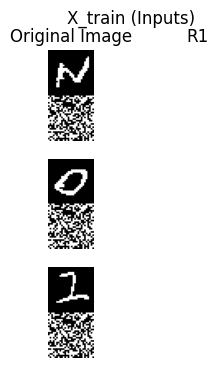

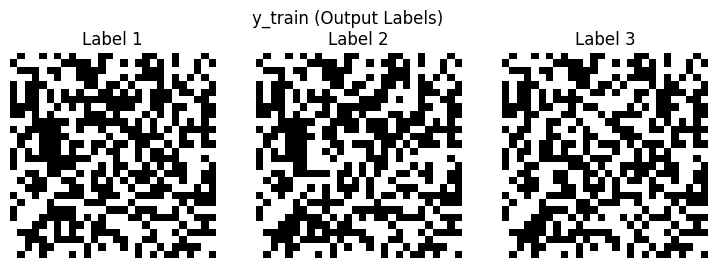

In [ ]:
fig1, axs1 = plt.subplots(3, 2, figsize=(3, 4))
for i in range(3):
    axs1[i, 0].imshow(X_train[i, :, :28, :], cmap='gray')
    axs1[i, 1].imshow(X_train[i, :, 28:, :], cmap='gray')
    axs1[i, 0].axis('off')
    axs1[i, 1].axis('off')
axs1[0, 0].set_title('Original Image')
axs1[0, 1].set_title('R1')
fig1.suptitle("X_train (Inputs)")


fig2, axs2 = plt.subplots(1, 3, figsize=(9, 3))
for i in range(3):
    axs2[i].imshow(y_train[i], cmap='gray')
    axs2[i].axis('off')
    axs2[i].set_title('Label {}'.format(i+1))
fig2.suptitle("y_train (Output Labels)")


In [ ]:
#Normalization
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(X):
    return (X-mean)/std

In [ ]:
# Define the input shape
input_shape = (56, 28, 1)

# Define the model architecture
model = Sequential()

# Add convolutional layers with 32 filters, a kernel size of 3x3, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add pooling layer to downsample the feature maps
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another set of convolutional and pooling layers with more filters
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps and add some fully connected layers to map to the output image
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(28*28, activation='sigmoid'))
model.add(Reshape((28, 28, 1)))

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])


In [ ]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 52, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 8, 64)         36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 4, 64)        0         
 2D)                                                    

In [ ]:
X_train.shape

(60000, 56, 28, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=13)

In [ ]:
# With data augmentation to prevent overfitting
# Data augmentation, achieves higher accuracy
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.01, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=128)
valid_gen = datagen.flow(X_valid, y_valid, batch_size=128)
test_gen = datagen.flow(X_test, y_test, batch_size=128)

In [ ]:
#Model training
epochs = 5
batch_size = 128
train_steps = X_train.shape[0] // batch_size
valid_steps = X_test.shape[0] // batch_size

es = keras.callbacks.EarlyStopping(
        monitor="val_acc", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, #
     )

rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_acc",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [ ]:
print( X_train.shape[0], train_steps)

48000 375


In [ ]:
# Fit the model
#history = model.fit_generator(train_gen, epochs = epochs, steps_per_epoch = train_steps, validation_data = test_gen, validation_steps = valid_steps,callbacks=[es, rp])
history = model.fit(train_gen,
                    epochs=epochs,
                    steps_per_epoch=train_steps,
                    validation_data=(valid_gen),
                    validation_steps=valid_steps,
                    callbacks=[es, rp])


Epoch 1/5
374/375 [============================>.] - ETA: 0s - loss: 0.1277 - accuracy: 0.9421

375/375 [==============================] - 26s 69ms/step - loss: 0.1277 - accuracy: 0.9421 - val_loss: 0.1265 - val_accuracy: 0.9426 - lr: 0.0010
Epoch 2/5
375/375 [==============================] - ETA: 0s - loss: 0.1233 - accuracy: 0.9443

375/375 [==============================] - 32s 84ms/step - loss: 0.1233 - accuracy: 0.9443 - val_loss: 0.1227 - val_accuracy: 0.9447 - lr: 0.0010
Epoch 3/5
374/375 [============================>.] - ETA: 0s - loss: 0.1201 - accuracy: 0.9459

375/375 [==============================] - 34s 91ms/step - loss: 0.1201 - accuracy: 0.9459 - val_loss: 0.1196 - val_accuracy: 0.9461 - lr: 0.0010
Epoch 4/5
374/375 [============================>.] - ETA: 0s - loss: 0.1174 - accuracy: 0.9473

375/375 [==============================] - 25s 67ms/step - loss: 0.1174 - accuracy: 0.9473 - val_loss: 0.1161 - val_accuracy: 0.9479 - lr: 0.0010
Epoch 5/5
375/375 [==============================] - ETA: 0s - loss: 0.1148 - accuracy: 0.9486

375/375 [==============================] - 25s 67ms/step - loss: 0.1148 - accuracy: 0.9486 - val_loss: 0.1144 - val_accuracy: 0.9488 - lr: 0.0010


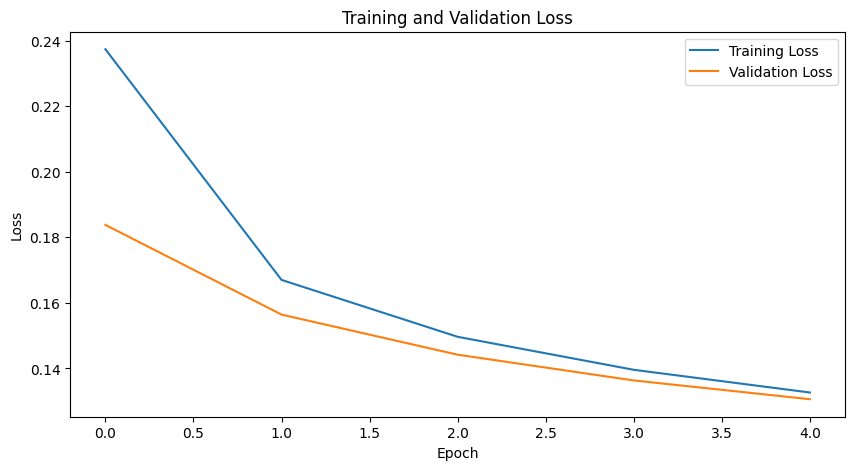

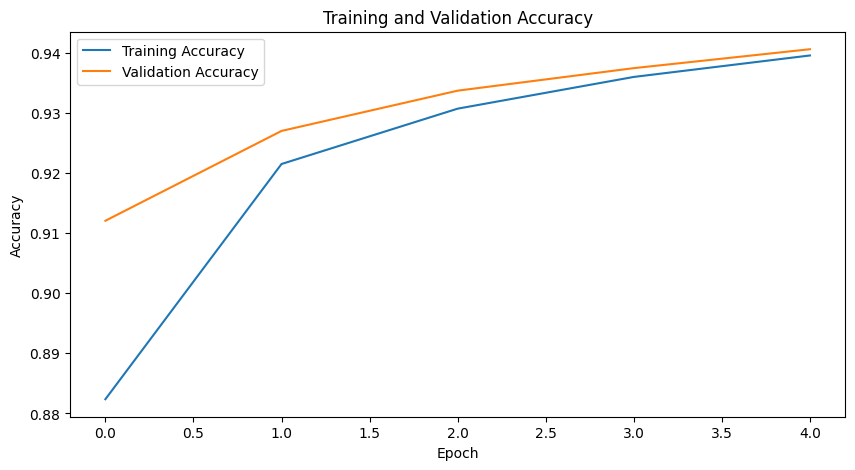

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


313/313 [==============================] - 1s 2ms/step
(10000, 28, 28, 1) (10000, 56, 28, 1)


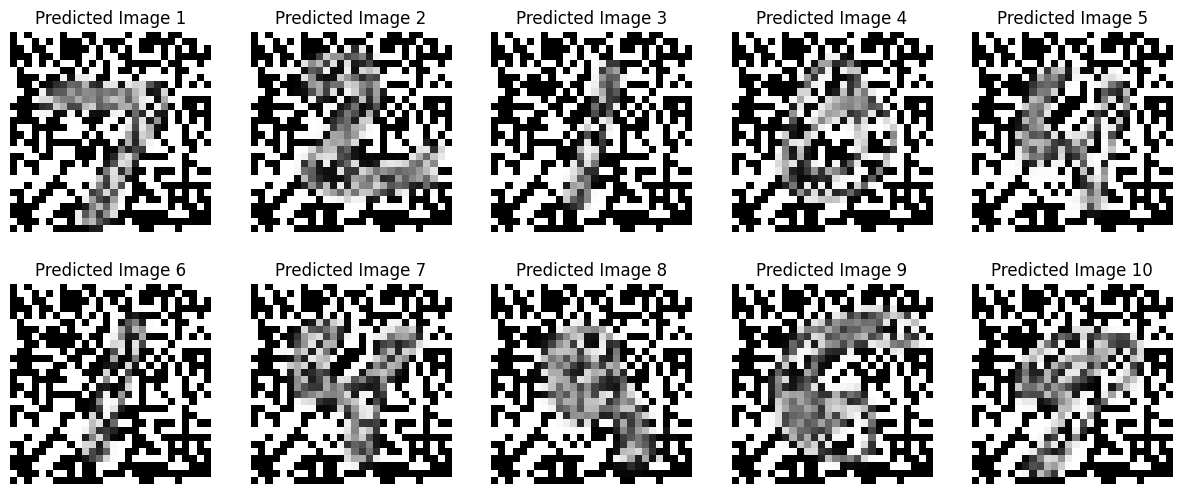

In [ ]:

# generate predicted images for X_test
y_pred = model.predict(X_test)

# print the shape of y_pred to verify it has the same shape as X_test
print(y_pred.shape, X_test.shape)

# visualize the first 10 predicted images
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(y_pred[i], cmap='gray')
    ax.set_title(f'Predicted Image {i+1}')
    ax.axis('off')
plt.show()


In [ ]:
print(y_pred[0])

In [ ]:
X_test.shape

(10000, 56, 28, 1)

In [ ]:
y_pred.shape

(10000, 28, 28, 1)

In [ ]:
r1 = r1.reshape(28,28)
X_test_original = X_test[:, :28].reshape(X_test.shape[0], 28, 28)
X_test_r1 = X_test[:, 28:].reshape(X_test.shape[0], 28, 28)
y_pred__ = y_pred.reshape(y_pred.shape[0], 28, 28)
y_test__ = y_test.reshape(y_test.shape[0], 28, 28)
decoded_img_pred = np.zeros_like(y_pred__)
decoded_img_test = np.zeros_like(y_test__)
num_samples = 4

print(X_test_original.shape, X_test_r1.shape, y_pred__.shape, y_test__.shape)
#print(X_test_original)
#print(X_test_r1)
#DECODE PREDICTED Y (R2)
for k in range(num_samples):
  for i in range(28):
    for j in range(28):
      if(y_pred__[k,i,j]<=0.5 and r1[i,j]==0)or(y_pred__[k,i,j]>0.5 and r1[i,j]==1):
        decoded_img_pred[k,i,j] = 0
      else:
        decoded_img_pred[k,i,j] = 1

#DECODE TEST Y(R2)
for k in range(num_samples):
  for i in range(28):
    for j in range(28):
      if(y_test__[k,i,j]==0 and r1[i,j]==0)or(y_test__[k,i,j]==1 and r1[i,j]==1):
        decoded_img_test[k,i,j] = 0
      else:
        decoded_img_test[k,i,j] = 1

(10000, 28, 28) (10000, 28, 28) (10000, 28, 28) (10000, 28, 28)


In [ ]:
decoded_img_pred.shape

(10000, 28, 28)

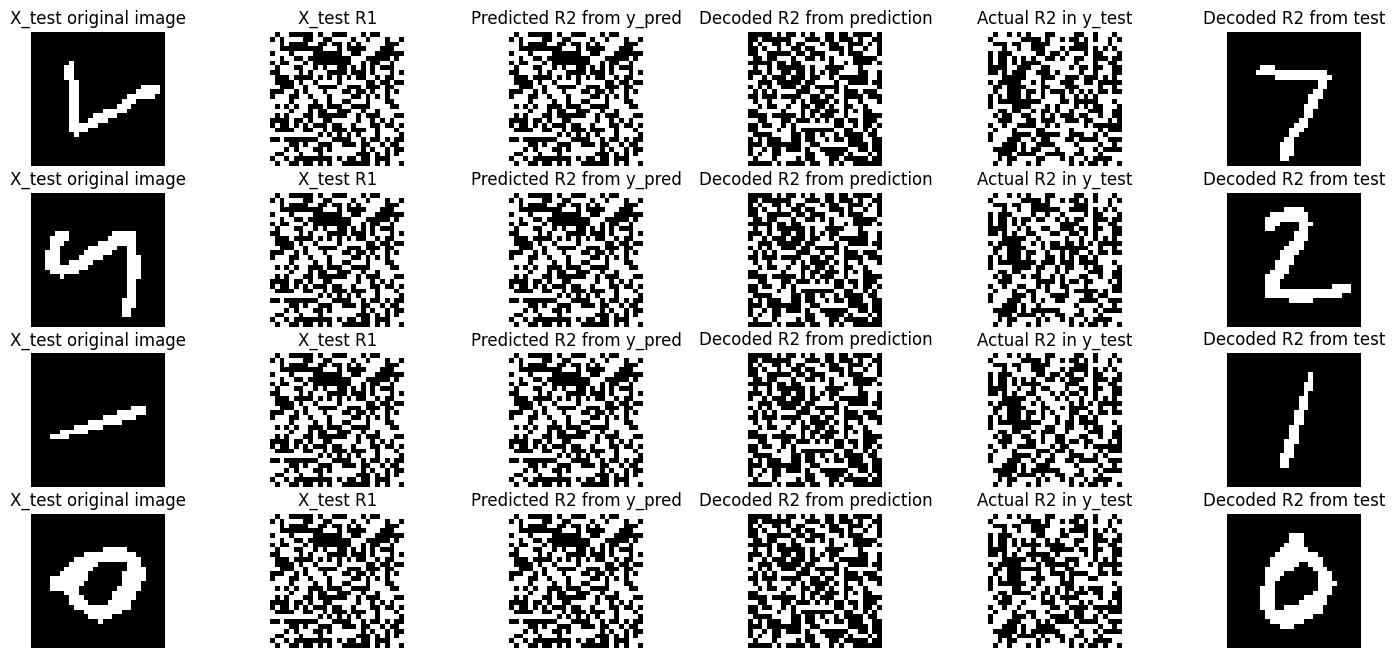

In [ ]:
fig, axs = plt.subplots(nrows=num_samples, ncols=6, figsize=(18, 8))
for i in range(num_samples):
    axs[i, 0].imshow(X_test_original[i].reshape(28, 28), cmap='gray')
    axs[i, 1].imshow(X_test_r1[i].reshape(28, 28), cmap='gray')
    axs[i, 2].imshow(y_pred__[i].reshape(28, 28), cmap='gray')
    axs[i, 3].imshow(decoded_img_pred[i].reshape(28, 28), cmap='gray')
    axs[i, 4].imshow(y_test__[i].reshape(28, 28), cmap='gray')
    axs[i, 5].imshow(decoded_img_test[i].reshape(28, 28), cmap='gray')
    axs[i, 0].axis('off')
    axs[i, 1].axis('off')
    axs[i, 2].axis('off')
    axs[i, 3].axis('off')
    axs[i, 4].axis('off')
    axs[i, 5].axis('off')
    axs[i, 0].set_title('X_test original image')
    axs[i, 1].set_title('X_test R1')
    axs[i, 2].set_title("Predicted R2 from y_pred")
    axs[i, 3].set_title("Decoded R2 from prediction")
    axs[i, 4].set_title("Actual R2 in y_test")
    axs[i, 5].set_title("Decoded R2 from test")
    #fig.suptitle("1")
plt.show()

In [ ]:
from math import log10, sqrt

def calc_psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 1
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

for i in range(num_samples):
  psnr = calc_psnr(decoded_img_pred[i].reshape(28, 28),X_test_original[i].reshape(28, 28))
  print("PSNR of Prediction: ",psnr) #100
  psnr = calc_psnr(decoded_img_test[i].reshape(28, 28),X_test_original[i].reshape(28, 28))
  print("PSNR of Test: ",psnr) #100

PSNR of Prediction:  8.079562320096901
PSNR of Test:  8.079562320096901
PSNR of Prediction:  6.3424467469936365
PSNR of Test:  6.3424467469936365
PSNR of Prediction:  10.814027060415828
PSNR of Test:  10.61807149978202
PSNR of Prediction:  9.030899869919436
PSNR of Test:  9.305282353388831


In [ ]:
import cv2
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(original_image, decrypted_image):

    ssim_value = ssim(original_image, decrypted_image, data_range=decrypted_image.max() - decrypted_image.min())
    return ssim_value

for i in range(num_samples):
  ssim_value = calculate_ssim(X_test_original[i].reshape(28, 28),decoded_img_pred[i].reshape(28, 28))
  print("SSIM of Prediction: ",ssim_value) #100
  ssim_value = calculate_ssim(X_test_original[i].reshape(28, 28),decoded_img_test[i].reshape(28, 28))
  print("SSIM of Test: ",ssim_value)



SSIM of Prediction:  0.2390545916386172
SSIM of Test:  0.2114891549455879
SSIM of Prediction:  0.0753135321714056
SSIM of Test:  0.06861196865568575
SSIM of Prediction:  0.37476455321299
SSIM of Test:  0.3717006378554916
SSIM of Prediction:  0.48853838729693655
SSIM of Test:  0.4687656913100029


In [ ]:
def cal_pixel_wise_accuracy(final, secret):
    secret_flat = secret.flatten()
    final_flat = final.flatten()

    # Calculate the accuracy by comparing each pixel
    accuracy = np.mean(secret_flat == final_flat)

    return accuracy

for i in range(num_samples):
  pixel_wise_acc = cal_pixel_wise_accuracy(decoded_img_pred[i].reshape(28, 28),X_test_original[i].reshape(28, 28))
  print("Pixel Wise accuracy of Prediction: ",pixel_wise_acc) #100
  pixel_wise_acc = cal_pixel_wise_accuracy(decoded_img_test[i].reshape(28, 28),X_test_original[i].reshape(28, 28))
  print("Pixel Wise accuracy of Test: ",pixel_wise_acc) #100

Pixel Wise accuracy of Prediction:  0.860969387755102
Pixel Wise accuracy of Test:  0.8443877551020408
Pixel Wise accuracy of Prediction:  0.7857142857142857
Pixel Wise accuracy of Test:  0.7678571428571429
Pixel Wise accuracy of Prediction:  0.9107142857142857
Pixel Wise accuracy of Test:  0.9132653061224489
Pixel Wise accuracy of Prediction:  0.8852040816326531
Pixel Wise accuracy of Test:  0.8826530612244898


In [ ]:
X_test_original[:num_samples].shape

(4, 28, 28)

In [ ]:
from sklearn.metrics import confusion_matrix

# Define the actual number of samples you want to evaluate
num_samples = 4  # Replace with the desired number

# Flatten the decoded images to match the original shape
decoded_img_pred = decoded_img_pred[:num_samples].reshape(num_samples, 28, 28)
decoded_img_test = decoded_img_test[:num_samples].reshape(num_samples, 28, 28)

# # Flatten the ground truth and predicted images
# y_true = X_test_original[:num_samples]
# y_pred = X_test_r1[:num_samples]

# Compute the confusion matrix
conf_matrix_pred = confusion_matrix(X_test_original[:num_samples].ravel(), decoded_img_pred.ravel())
conf_matrix_test = confusion_matrix(X_test_original[:num_samples].ravel(), decoded_img_test.ravel())

print("Confusion Matrix for Decoded Predicted Images:")
print(conf_matrix_pred)

print("\nConfusion Matrix for Decoded Test Images:")
print(conf_matrix_test)


Confusion Matrix for Decoded Predicted Images:
[[2536  229]
 [ 238  133]]

Confusion Matrix for Decoded Test Images:
[[2533  232]
 [ 232  139]]


In [ ]:
decoded_img_pred.shape

(4, 28, 28)

In [ ]:
from sklearn.metrics import confusion_matrix

# Define the actual number of samples you want to evaluate
num_samples = 10000  # Replace with the desired number

# Flatten the decoded images to match the original shape
decoded_img_pred = decoded_img_pred[:num_samples].reshape(num_samples, 28, 28)
decoded_img_test = decoded_img_test[:num_samples].reshape(num_samples, 28, 28)

# # Flatten the ground truth and predicted images
# y_true = X_test_original[:num_samples]
# y_pred = X_test_r1[:num_samples]

# Compute the confusion matrix
conf_matrix_pred = confusion_matrix(X_test_original[:num_samples].ravel(), decoded_img_pred.ravel())
conf_matrix_test = confusion_matrix(X_test_original[:num_samples].ravel(), decoded_img_test.ravel())

print("Confusion Matrix for Decoded Predicted Images:")
print(conf_matrix_pred)

print("\nConfusion Matrix for Decoded Test Images:")
print(conf_matrix_test)


Confusion Matrix for Decoded Predicted Images:
[[6787431     210]
 [1052215     144]]

Confusion Matrix for Decoded Test Images:
[[6787409     232]
 [1052220     139]]


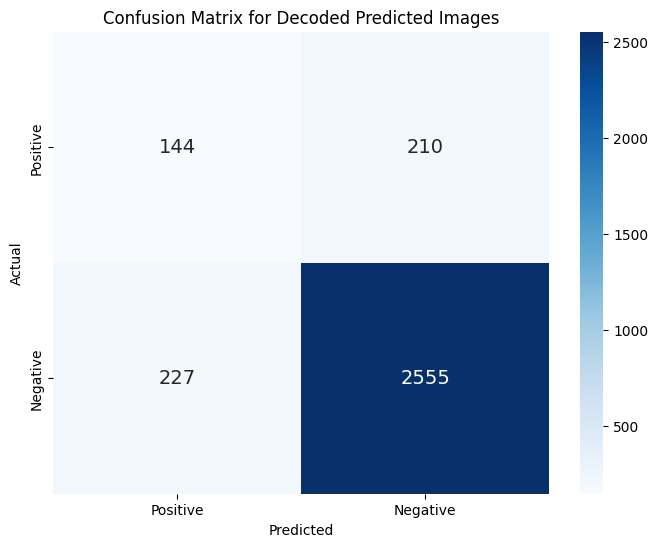

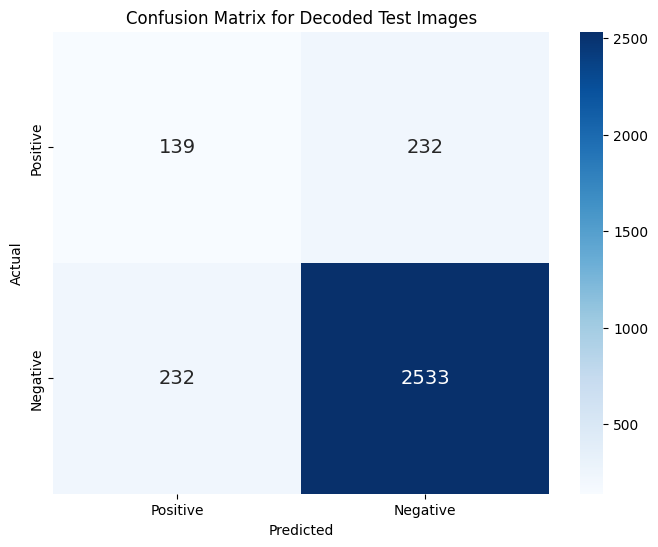

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# conf_matrix_pred_new = [[144,210],[1052215,6787431]]
# conf_matrix_test_new = [[139,232],[1052220,6787409]]

# [[2555  210]
#  [ 227  144]]

# [[2533  232]
#  [ 232  139]]

conf_matrix_pred_new = [[144,210],[227,2555]]
conf_matrix_test_new = [[139,232],[232,2533]]


# Labels for the classes
class_labels = ['Class 0', 'Class 1']
# Labels for confusion matrix cells
confusion_labels = [['Positive', 'Negative'], ['Positive', 'Negative']]

# Plotting Confusion Matrix for Decoded Predicted Images
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pred_new, annot=True, fmt="d", cmap="Blues", xticklabels=confusion_labels[0], yticklabels=confusion_labels[1], annot_kws={"size": 14})
plt.title("Confusion Matrix for Decoded Predicted Images")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plotting Confusion Matrix for Decoded Test Images
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_new, annot=True, fmt="d", cmap="Blues", xticklabels=confusion_labels[0], yticklabels=confusion_labels[1], annot_kws={"size": 14})
plt.title("Confusion Matrix for Decoded Test Images")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# True Negative (TN):  6787431 (Predicted as 0, Actually 0)
# False Positive (FP): 210 (Predicted as 1, Actually 0)
# False Negative (FN): 1052215 (Predicted as 0, Actually 1)
# True Positive (TP):  144 (Predicted as 1, Actually 1)

# True Negative (TN):  6787409 (Predicted as 0, Actually 0)
# False Positive (FP): 232 (Predicted as 1, Actually 0)
# False Negative (FN): 1052220 (Predicted as 0, Actually 1)
# True Positive (TP):  139 (Predicted as 1, Actually 1)

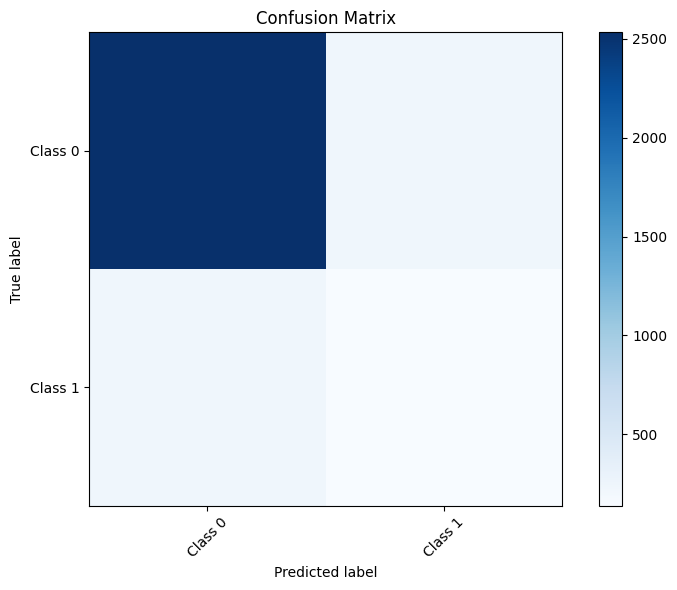

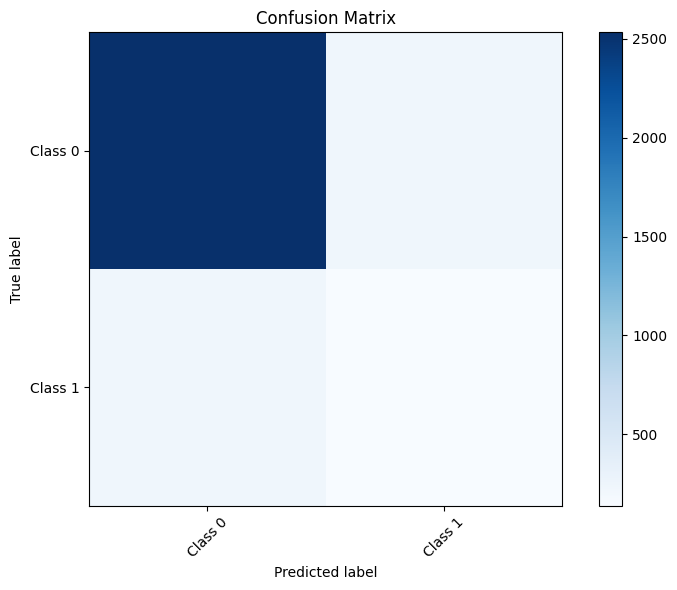

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the confusion matrix (using the corrected code snippet from before)
conf_matrix_test = confusion_matrix(y_true.ravel(), decoded_img_test.ravel())

# Plot the confusion matrix as an image
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Class 0', 'Class 1']  # Replace with your class labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

conf_matrix_pred = confusion_matrix(y_true.ravel(), decoded_img_pred.ravel())

# Plot the confusion matrix as an image
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Class 0', 'Class 1']  # Replace with your class labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()
